In [11]:
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from Parameters_Diffusion import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.lines as mlines

DiscretePreyAverageTau = np.load('./Solutions/TauDiffusionAverageM10.npy')

DiscretePreyAverageExplicit = np.load('./Solutions/ExplicitDiffusionAverage.npy')

ReferencePrey = np.load('./Solutions/FDSolution_Diffusion.npy')


ts=0.1

maxtime=deltat*(timesteps-1)
timesteps_cut = int(deltat * (timesteps-1) / ts)
constant=int(ts/deltat)
Times=np.arange(ts, maxtime+ts, ts)
print(constant)
def HybridPlot(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    listH = []  # list of Hybrid solutions
    listR = []  # list of Reference solutions
    
   
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Ref_t=Reference[(t+1)*constant]
        Average_t = np.transpose(Average[t]) 
        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling,l_coupling))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
            
            for j in range(int(l_coupling / 2)):
                
                Particle[i,j+int(l_coupling/2)]=Ref_t[i,j+int(l_coupling/2)]
        listH.append(Particle)
            
        
    for t in range(timesteps_cut):
        
        Ref_t=Reference[(t+1)*constant]
       
       
        listR.append(Ref_t)

    return listH, listR


#%%
# Define the custom colormap with specified colors
colors1 = ['black','indigo', 'royalblue', 'lightskyblue', 'azure']
n_bins1 = 256  # Number of bins for the colormap

# Create the colormap
custom_colormap1 = LinearSegmentedColormap.from_list('custom_colormap', colors1, N=n_bins1)

#%% Plot for Susceptible

HybridPreyTau, ReferencePreyList = HybridPlot(DiscretePreyAverageTau, ReferencePrey, l_coupling)
HybridPreyExplicit, ReferencePreyList = HybridPlot(DiscretePreyAverageExplicit, ReferencePrey, l_coupling)


def Mean(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    Hmean=np.zeros(timesteps_cut)
    Cmean=np.zeros(timesteps_cut)
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Average_t = np.transpose(Average[t])  # get reservoir

        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling, int(l_coupling/2)))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
        # average
        Hmean[t]=np.mean(Particle)
    
    constant=int(ts/deltat)
    k=0
    for t in range(timesteps_cut):
        
        Ref_t=Reference[(t+1)*constant]
        
        Concentration_t= np.zeros(shape=(l_coupling, int(l_coupling/2)))
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2)):
                 Concentration_t[i, j  ]=Ref_t[i,j]
        
        Cmean[k]=np.mean(Concentration_t)
        k=k+1

    return Hmean, Cmean 

Prey_meanExplicit, Ref_mean=Mean(DiscretePreyAverageExplicit, ReferencePrey, l_coupling)
Prey_meanTau, Ref_mean=Mean(DiscretePreyAverageTau, ReferencePrey, l_coupling)



50


In [12]:

JSD1=np.load('./Solutions/JSDTauDiffusionM1.npy') 

JSD2=np.load('./Solutions/JSDTauDiffusionM2.npy') 

JSD5=np.load('./Solutions/JSDTauDiffusionM5.npy') 

JSD10=np.load('./Solutions/JSDTauDiffusionM10.npy') 

JSD15=np.load('./Solutions/JSDTauDiffusionM15.npy') 

JSDE=np.load('./Solutions/JSDExplicitDiffusion.npy') 

#%%
Mvalues=[1,2,5,10,15]
M=5 # number of M vlaues 
t=4

JSD_Tau_Values=np.log([JSD1[t],JSD2[t],JSD5[t],JSD10[t],JSD15[t]])
JSD_Explicit=np.log(np.ones(5)*JSDE[t])

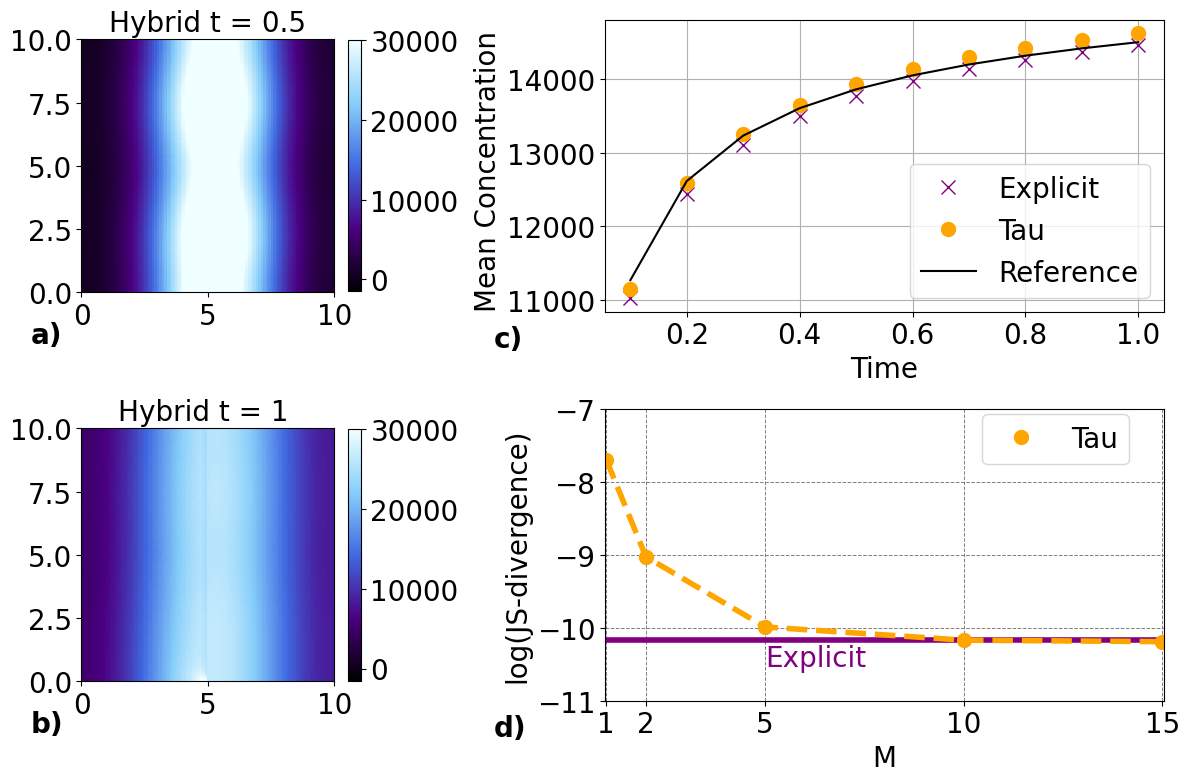

In [22]:
# big plot
TimeSteps=[4,9]
Max=30000
# Maximize the figure size
fig, ax = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 2]})

# Hybrid t=0.5 with colorbar
img1 = ax[0, 0].imshow(HybridPreyTau[TimeSteps[0]], interpolation='nearest', cmap=custom_colormap1, extent=[0, a, 0, a])
cbar1 = plt.colorbar(img1, ax=ax[0, 0], fraction=0.045)
cbar1.ax.tick_params(labelsize=20)  # Set font size of colorbar ticks

ax[0, 0].set_title('Hybrid t = 0.5', fontsize=20)
img1.set_clim(-Max / 20, Max)  # Adjust color range
ax[0, 0].tick_params(axis='y', labelsize=20)  # Adjust y-axis tick font size
ax[0, 0].tick_params(axis='x', labelsize=20)  # Adjust y-axis tick font size
ax[0, 0].text(
    -0.2,  # Normalized x-coordinate (0=left, 1=right of subplot)
    -0.2,  # Normalized y-coordinate (below the plot)
    'a)',
    color='black',
    fontsize=20,
    fontweight='bold',
    ha='left',  # Center the text horizontally
    transform=ax[0, 0].transAxes  # Use subplot's axes for positioning
)


# Hybrid t=1 with colorbar
img2 = ax[1, 0].imshow(HybridPreyTau[TimeSteps[1]], interpolation='nearest', cmap=custom_colormap1, extent=[0, a, 0, a])
cbar2 = plt.colorbar(img2, ax=ax[1, 0], fraction=0.045)
cbar2.ax.tick_params(labelsize=20)  # Set font size of colorbar ticks
ax[1, 0].tick_params(axis='y', labelsize=20)  # Adjust y-axis tick font size
ax[1, 0].tick_params(axis='x', labelsize=20)  # Adjust y-axis tick font size


img2.set_clim(-Max / 20, Max)  # Adjust color range
ax[1, 0].set_title('Hybrid t = 1 ', fontsize=20)

# Plot data on the right
ax[0, 1].plot(Times, Prey_meanExplicit, 'x', markersize=10, markevery=1, color='purple', label='Explicit')
ax[0, 1].plot(Times, Prey_meanTau, 'o', markersize=10, markevery=1, color='orange', label='Tau')
ax[0, 1].plot(Times, Ref_mean, color='black', label='Reference')
ax[0, 1].grid(True)  # Add grid
ax[0, 1].legend(fontsize=20)
ax[0, 1].set_xlabel('Time', fontsize=20)
ax[0, 1].set_ylabel('Mean Concentration ', fontsize=20)
ax[0, 1].tick_params(axis='y', labelsize=20)  # Adjust y-axis tick font size
ax[0, 1].tick_params(axis='x', labelsize=20)  # Adjust y-axis tick font size

ax[1, 0].text(
    -0.2,  # Normalized x-coordinate (0=left, 1=right of subplot)
    -0.2,  # Normalized y-coordinate (below the plot)
    'b)',
    color='black',
    fontsize=20,
    fontweight='bold',
    ha='left',  # Center the text horizontally
    transform=ax[1, 0].transAxes  # Use subplot's axes for positioning
)

ax[0, 1].text(
    -0.2,  # Normalized x-coordinate (0=left, 1=right of subplot)
    -0.12,  # Normalized y-coordinate (below the plot)
    'c)',
    color='black',
    fontsize=20,
    fontweight='bold',
    ha='left',  # Center the text horizontally
    transform=ax[0, 1].transAxes  # Use subplot's axes for positioning
)


ax[1, 1].plot(Mvalues, JSD_Explicit, '-', color='purple', linewidth=4, label=f't = {np.round(ts*(Times[t]+1), decimals=2)}')

ax[1, 1].plot(Mvalues,JSD_Tau_Values, '--', color='orange', linewidth=4, label=f't = {np.round(ts*(Times[t]+1), decimals=2)}')


ax[1, 1].plot(Mvalues,JSD_Tau_Values, 'o', color='orange', markersize=10)

ax[1, 1].set_xlabel('M', fontsize=20)
ax[1, 1].set_ylabel('log(JS-divergence)', fontsize=20)

# Set x-axis ticks
  # Adjust according to your data limits
ax[1, 1].set_xticks(Mvalues)  # Use set_xticks to define custom ticks
ax[1, 1].tick_params(axis='x', labelsize=20)  # Adjust tick label size

# Set y-axis ticks
#yticks = [0.0055, 0.005, 0.0045, 0.004]  # Custom tick values
#ax[1, 1].set_yticks(yticks)  # Use set_yticks to define custom ticks
ax[1, 1].tick_params(axis='y', labelsize=20)  # Adjust tick label size

ax[1, 1].text(
    -0.2,  # Normalized x-coordinate (0=left, 1=right of subplot)
    -0.12,  # Normalized y-coordinate (below the plot)
    'd)',
    color='black',
    fontsize=20,
    fontweight='bold',
    ha='left',  # Center the text horizontally
    transform=ax[1, 1].transAxes  # Use subplot's axes for positioning
)

plt.ylim(  -11,-7)
plt.xlim(  0.97,15.03)


orange_dot = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Tau')

plt.legend(handles=[ orange_dot], fontsize=20, ncol=1,  loc='upper left', bbox_to_anchor=(0.65, 1.03))
plt.grid(which='both', linestyle='--', linewidth=0.7, color='gray')  # Customize as needed
plt.text(5, JSD_Explicit[0]*1.035,'Explicit',color='purple', fontsize=20)


# Set x-axis ticks


plt.grid(which='both', linestyle='--', linewidth=0.7, color='gray')  # Customize as needed

plt.tight_layout()



plt.savefig('./Plots/Diffusion/DiffusionPlotThesis.png')